<a href="https://colab.research.google.com/github/VaishnaviBairagoni/Data-Mining/blob/main/Report_ADM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas as pd
import numpy as np
import re
import nltk
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score

# Load NLTK Stopwords
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

# Load your dataset
df = pd.read_csv("/content/spam.csv")  # Update with your file name

# **Print the actual column names to identify the correct ones**
print(df.columns)

# **Replace 'case_text' and 'case_outcome' with the actual column names**
# For example, if the actual column names are 'text' and 'target', use:
df = df[['text', 'target']]  # Ensure correct columns

# Text cleaning function
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'\W+', ' ', text)
    text = re.sub(r'\d+', '', text)
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

# Preprocess text
df['clean_text'] = df['text'].apply(clean_text) # **Use the actual column name here too**

# Encode target labels
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['target']) # **Use the actual column name here too**

# Split data
X = df['clean_text']
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# TF-IDF Vectorizer + Logistic Regression Pipeline
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)

# Prediction & Evaluation
y_pred = model.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)

# Output results
print("Accuracy:", round(accuracy, 3))
print("Precision:", round(precision, 3))
print("Recall:", round(recall, 3))
print("\nClassification Report:\n", report)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Index(['text', 'target'], dtype='object')
Accuracy: 0.955
Precision: 0.955
Recall: 0.955

Classification Report:
               precision    recall  f1-score   support

         ham       0.96      0.99      0.97       965
        spam       0.95      0.70      0.81       150

    accuracy                           0.96      1115
   macro avg       0.95      0.85      0.89      1115
weighted avg       0.96      0.96      0.95      1115



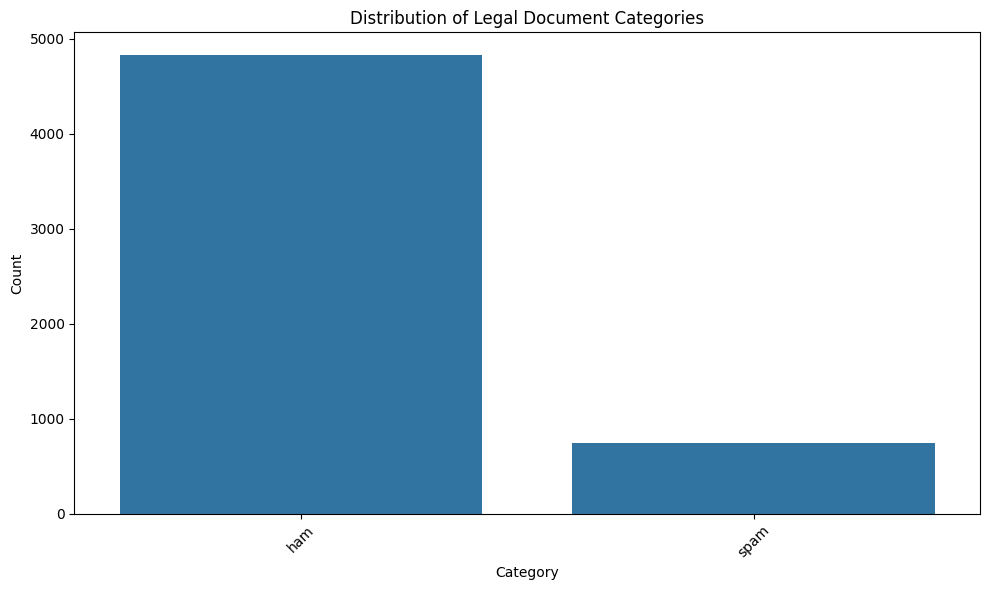

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribution of categories
plt.figure(figsize=(10, 6))
# Replace 'case_outcome' with the actual column name you are using for categories (e.g., 'target')
sns.countplot(x='target', data=df, order=df['target'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Distribution of Legal Document Categories")
plt.xlabel("Category")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

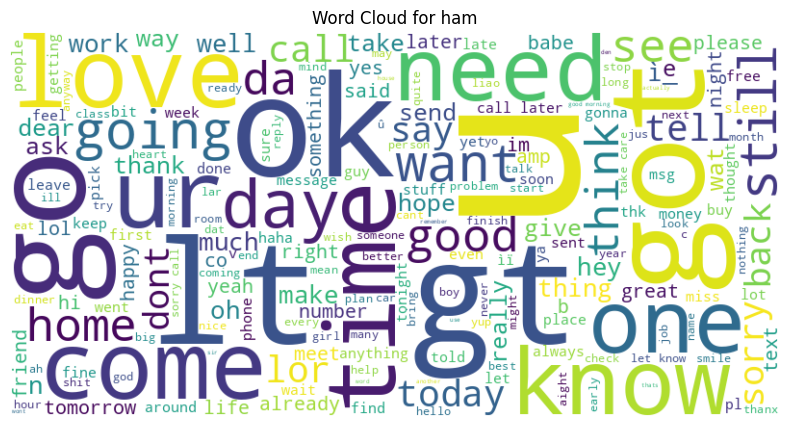

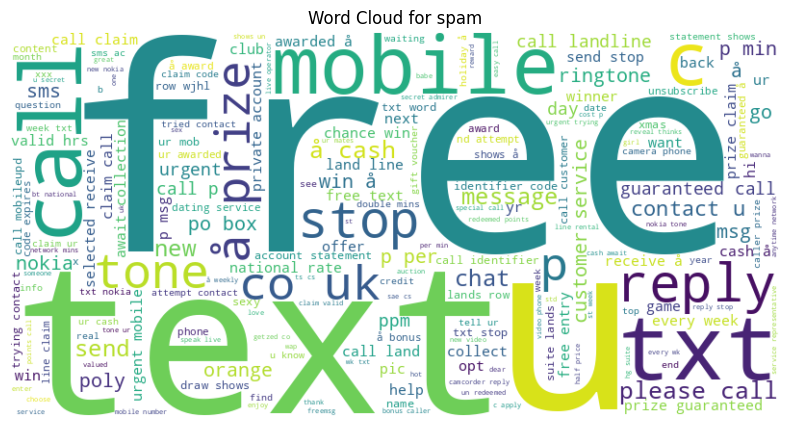

In [16]:
from wordcloud import WordCloud

# Replace 'case_outcome' with the correct column name, likely 'target'
categories = df['target'].unique()

for cat in categories:
    # Replace 'case_outcome' with the correct column name here as well
    text = " ".join(df[df['target'] == cat]['clean_text'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud for {cat}")
    plt.show()

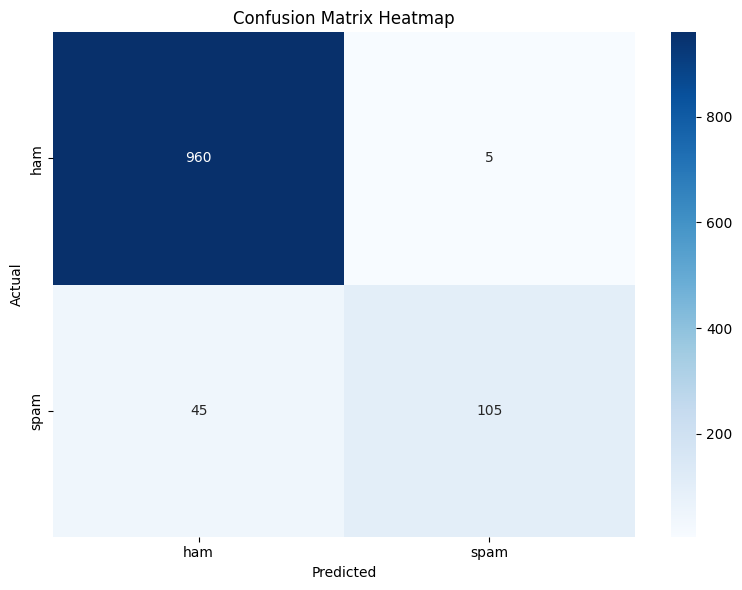

In [17]:
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()
